In [11]:
import numpy as np
import pandas as pd

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# scikit-learn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
pip install openpyxl


In [13]:
#Import data
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDNames)

In [27]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [14]:
# EXPLORATORY DATA ANALYSIS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            302 non-null    object 
 12  hal           302 non-null    object 
 13  HeartDisease  302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [15]:
# HANDLING MISSING DATA
# Replacing missing values ("?") with NaN
data_new = data.replace("?", np.nan)

In [30]:
# Showing information about data with NaN
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [16]:
# Summary statistics
data_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [17]:
# Checking how many missing values there are per column
data_new.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
hal             2
HeartDisease    0
dtype: int64

In [18]:
# Removing rows with missing values
data_new = data_new.dropna()

In [19]:
# Rechecking information after removing missing values
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hal           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.7 KB


In [20]:
# Confirm no more missing data
data_new.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [21]:
feature_names = HDNames
feature_names.pop()

'HeartDisease'

In [22]:
features = pd.DataFrame(data_new.iloc[:, 0:13], columns = feature_names)

In [23]:
target = pd.DataFrame(data_new.iloc[:,13], columns=["HeartDisease"])

In [24]:
scaler = StandardScaler() 
print(scaler.fit(features))

StandardScaler()


In [25]:
FeatureScaled = scaler.fit_transform(features)
FeatureScaled = pd.DataFrame(FeatureScaled, columns= feature_names)
summary = FeatureScaled.describe()
summary = summary.transpose()

In [26]:
# Summary statistics of scaled features

summary

,count,mean,std,min,25%,50%,75%,max
age,296.0,-2.550512e-16,1.001693,-2.823438,-0.720814,0.164501,0.717823,2.488454
sex,296.0,6.001206e-18,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.860374e-16,1.001693,-2.263690,-0.173043,-0.173043,0.872280,0.872280
trestbps,296.0,1.920386e-16,1.001693,-2.121540,-0.656413,-0.092903,0.470607,3.851669
chol,296.0,6.601326e-17,1.001693,-2.334999,-0.700097,-0.084604,0.554931,6.089557
fbs,296.0,2.700542e-17,1.001693,-0.406638,-0.406638,-0.406638,-0.406638,2.459191
restecg,296.0,-4.800964e-17,1.001693,-1.000046,-1.000046,0.006803,1.013652,1.013652
thalach,296.0,2.160434e-16,1.001693,-3.426010,-0.723490,0.148291,0.714949,2.284154
exang,296.0,1.342770e-16,1.001693,-0.698167,-0.698167,-0.698167,1.432322,1.432322
oldpeak,296.0,6.001206e-17,1.001693,-0.903324,-0.903324,-0.215962,0.471400,4.423733


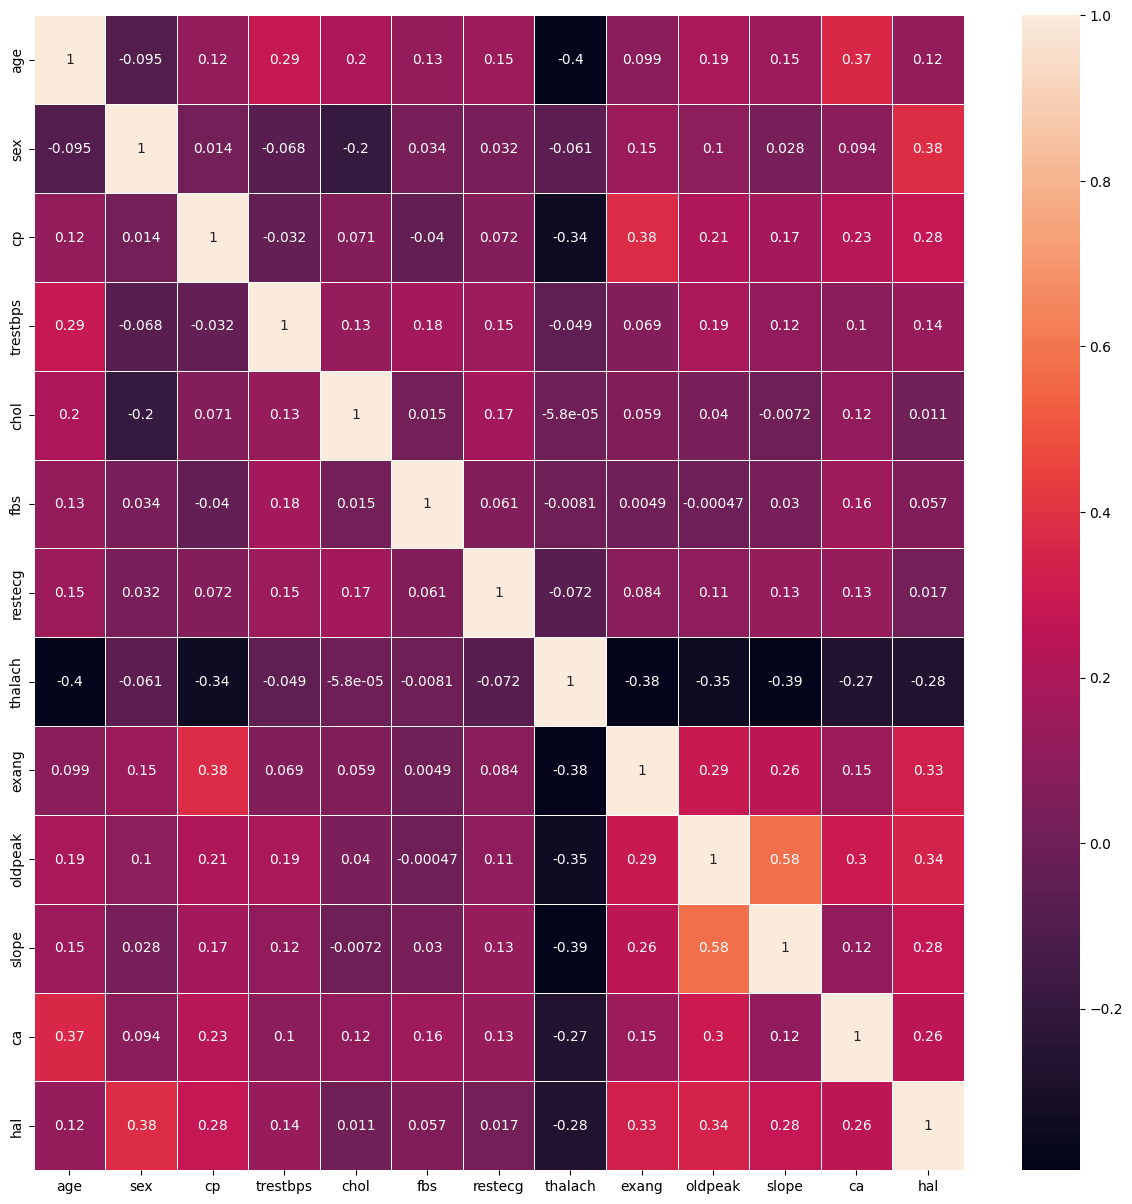

In [27]:
# Correlation matrix
corrMatrix = FeatureScaled.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [28]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
# Convert the target to a Series if it's a DataFrame
X_train, X_test, y_train, y_test = train_test_split(FeatureScaled, target.squeeze(), test_size=0.30, random_state=5)


In [30]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier()
}

In [32]:
# Evaluate each model
results = {}

for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = {
            'Accuracy': accuracy,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred, output_dict=True)
        }
        
    except Exception as e:
        print(f"Error occurred with model {model_name}: {e}")


c:\Users\VICKY MAHATO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Accuracy: 0.8652
Confusion Matrix:
[[38  4]
 [ 8 39]]
Classification Report:
{'0': {'precision': 0.8260869565217391, 'recall': 0.9047619047619048, 'f1-score': 0.8636363636363636, 'support': 42.0}, '1': {'precision': 0.9069767441860465, 'recall': 0.8297872340425532, 'f1-score': 0.8666666666666667, 'support': 47.0}, 'accuracy': 0.8651685393258427, 'macro avg': {'precision': 0.8665318503538928, 'recall': 0.867274569402229, 'f1-score': 0.8651515151515152, 'support': 89.0}, 'weighted avg': {'precision': 0.8688040354006431, 'recall': 0.8651685393258427, 'f1-score': 0.8652366360231528, 'support': 89.0}}


Model: Decision Tree
Accuracy: 0.7640
Confusion Matrix:
[[33  9]
 [12 35]]
Classification Report:
{'0': {'precision': 0.7333333333333333, 'recall': 0.7857142857142857, 'f1-score': 0.7586206896551724, 'support': 42.0}, '1': {'precision': 0.7954545454545454, 'recall': 0.7446808510638298, 'f1-score': 0.7692307692307693, 'support': 47.0}, 'accuracy': 0.7640449438202247

In [34]:
# Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = "tanh"))
model.add(Dense(20, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


c:\Users\VICKY MAHATO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3644 - loss: 0.8419  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5149 - loss: 0.6969
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6434 - loss: 0.6086 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7126 - loss: 0.5704 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.5221 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7824 - loss: 0.4827 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4484 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8165 - loss: 0.4200 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.4170 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8382 - loss: 0.3959
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8321 - loss: 0.4024 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8213 - loss: 0.4011

In [36]:
# Evaluating model accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Keras Model Accuracy = ", score[1])

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary outcomes

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Keras Model Accuracy =  0.8426966071128845
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
[[37  5]
 [ 9 38]]
